In [6]:
import numpy as np
import pandas as pd
import torch
from model import *

In [7]:
data = pd.read_csv("data.csv")
# 窗口划分
def split_windows(data, size):
    X = []
    Y = []
    # X作为数据，Y作为标签
    # 滑动窗口，步长为1，构造窗口化数据，每一个窗口的数据标签是窗口末端的close值（收盘价格）
    for i in range(len(data) - size):
        X.append(data[i:i+size, :])
        Y.append(data[i+size, 2])
    return np.array(X), np.array(Y)
df = pd.read_csv('data.csv', usecols=['open', 'high', 'close', 'low', 'volume'])
all_data = df.values
train_len = 500
train_data = all_data[:train_len, :]
test_data = all_data[train_len:, :]
scaler = MinMaxScaler()
scaled_train_data = scaler.fit_transform(train_data)
# 使用训练集的最值对测试集归一化，保证训练集和测试集的分布一致性
scaled_test_data = scaler.transform(test_data)
# 训练集测试集划分
window_size = 7
train_X, train_Y = split_windows(scaled_train_data, size=window_size)
test_X, test_Y = split_windows(scaled_test_data, size=window_size)
print("test_X: {}, test_Y: {}\n".format(test_X.shape,test_Y.shape))

test_X: (99, 7, 5), test_Y: (99,)



In [8]:
mymodel = torch.load('work/model.pth')

C:\Users\DELL\AppData\Local\Temp\ipykernel_7636\2819263687.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  mymodel = torch.load('work/model.pth')


RMSE 0.4736634365252418


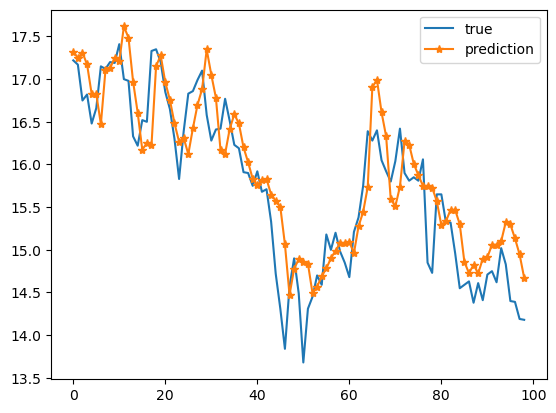

In [9]:
# 加载模型
# model = CNN_LSTM(window_size, fea_num)
test_X = torch.tensor(test_X)
test_X = test_X.float()
prediction = mymodel(test_X)
prediction = prediction.detach().numpy()
prediction = prediction.reshape(prediction.shape[0], )
# 反归一化
scaled_prediction = prediction * (scaler.data_max_[2] - scaler.data_min_[2]) + scaler.data_min_[2]
scaled_true = test_Y * (scaler.data_max_[2] - scaler.data_min_[2]) + scaler.data_min_[2]
# 画图
plt.plot(range(len(scaled_true)), scaled_true, label='true')
plt.plot(range(len(scaled_prediction)), scaled_prediction, label='prediction', marker='*')
plt.legend()

from sklearn.metrics import mean_squared_error
print('RMSE', np.sqrt(mean_squared_error(scaled_prediction, scaled_true)))